In [1]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff


In [2]:
#Load datasets
df_stocks = pd.read_csv('big_tech_stock_prices.csv', parse_dates=['Date'])
df_companies = pd.read_csv('big_tech_companies.csv')

In [3]:
# Preliminary data exploration
df_stocks.dtypes

stock symbol            object
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
dtype: object

In [4]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock symbol  45088 non-null  object        
 1   Date          45088 non-null  datetime64[ns]
 2   Open          45088 non-null  float64       
 3   High          45088 non-null  float64       
 4   Low           45088 non-null  float64       
 5   Close         45088 non-null  float64       
 6   Adj Close     45088 non-null  float64       
 7   Volume        45088 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.8+ MB


In [5]:
df_stocks.describe()

Date          Open          High  \
count                          45088  45088.000000  45088.000000   
mean   2016-08-03 15:35:09.794180352     89.266584     90.369825   
min              2010-01-04 00:00:00      1.076000      1.108667   
25%              2013-05-30 00:00:00     25.670000     25.930135   
50%              2016-08-09 00:00:00     47.930000     48.459999   
75%              2019-10-21 06:00:00    128.662502    129.848900   
max              2023-01-24 00:00:00    696.280029    700.989990   
std                              NaN    101.626955    103.001073   

                Low         Close     Adj Close        Volume  
count  45088.000000  45088.000000  45088.000000  4.508800e+04  
mean      88.111930     89.271306     85.209631  5.297813e+07  
min        0.998667      1.053333      1.053333  5.892000e+05  
25%       25.360001     25.660000     22.076433  9.629425e+06  
50%       47.465000     47.970001     45.377333  2.646315e+07  
75%      127.253945    128.640609    113.672460  5.839768e+07  
max      686.090027    691.690002    691.690002  1.880998e+09  
std      100.124399    101.592916    100.995967  9.324730e+07

In [6]:
#Stock price trend over time
fig = px.line(df_stocks, x='Date', y='Adj Close', color='stock symbol', 
        labels={'Adj Close': 'Adjusted Close Price'}, 
        title='Stock Price Trend Over Time For Big Tech Companies')
fig.show()

The graph indicates a consistent upward trajectory in stock prices across all companies until the onset of 2022. However, at the beginning of that year, a notable downturn occurred, followed by a stabilization in the stock prices for the remainder of the year. This leveling out was particularly pronounced for Adobe and Netflix, where the impact of the downward spike was most significant.

In [7]:
# Comparing Stock Performance
avg_prices = df_stocks.groupby(['stock symbol', df_stocks['Date'].dt.year])['Adj Close'].mean().reset_index()
fig = px.line(avg_prices, x='Date', y='Adj Close', color='stock symbol',
        labels={'Adj Close': 'Average Adjusted Close Price', 'Date': 'Year'},
        title='Average Adjusted Closing Price Over Time For Big Tech Companies')
fig.show()

This graph further pronounces the negative impact 2022 had on the stock prices of these companies. This seemed to roll over to 2023 for Meta as their adjusted closing price dropped even lower. The cause of which could partially be related to their legal battles in Europe concerning the GDPR.

In [8]:
#Daily Stock Price Volatility
df_stocks['volatility'] = df_stocks.groupby('stock symbol')['Adj Close'].pct_change() * 100
fig = px.line(df_stocks, x='Date', y='volatility', color='stock symbol',
        labels={'volatility': 'Daily % Change in Adjusted Close Price'},
        title='Daily Stock Price Volatility For Big Tech Companies')
fig.show()

A more in-depth analysis of stock price volatility reveals heightened instability in 2022, marked by historical lows for several companies. Notably, Netflix experienced the most substantial impact yet again. This increased volatility might be partially ascribed to shifts in consumer behavior, particularly in the saturated and competitive streaming service market where other companies are offering lower subscription prices.

In [9]:
# Correlation analysis between company stock prices
pivot = df_stocks.pivot(index='Date', columns='stock symbol', values='Adj Close') 
correlation_matrix = pivot.corr()
fig = px.imshow(correlation_matrix.round(2), text_auto=True, title='Correlation Matrix of Big Tech Company Stock Prices')
fig.show()

Examining the correlation matrix, it becomes evident that IBM stands out as an outlier within the big tech category. This deviation is also reflected in their stock performance, as they deviated from the downward trend observed in earlier graphs, maintaining a relatively level trajectory. Notably, there exists a strong correlation between Adobe, Amazon, and Salesforce. This correlation may signify investor behavior and market sentiment trends within the cloud computing industry.

In [10]:
#Average Daily Trading Volume
daily_volume = df_stocks.groupby(['stock symbol', df_stocks['Date'].dt.year])['Volume'].mean().reset_index()
fig = px.line(daily_volume, x='Date', y='Volume', color='stock symbol',
        labels={'Date': 'Year', 'Volume': 'Average Daily Trading Volume'},
        title= 'Average Daily Trading Volume Over Time for Big Tech Companies')
fig.show()

The trading volume for these companies exhibited resilience in the face of the 2022 challenges. While there was a notable dip in 2020, likely attributed to the pandemic, with Tesla, Apple, and Amazon being particularly affected, 2022 showed minimal fluctuations for most companies. NVIDIA stood out with a slight rise in trading volume during this period. This suggests that, unlike the volatility observed in stock prices, trading activity remained relatively stable for the majority of the big tech companies in 2022.

Finally, upon plotting the distribution of stock prices for 2021 alongside that of 2022, a stark shift in the range becomes evident. This visual representation underscores the profound impact that the year had on big tech companies, clearly illustrating the contrast in the distribution patterns and emphasizing the notable changes in stock prices during this period.

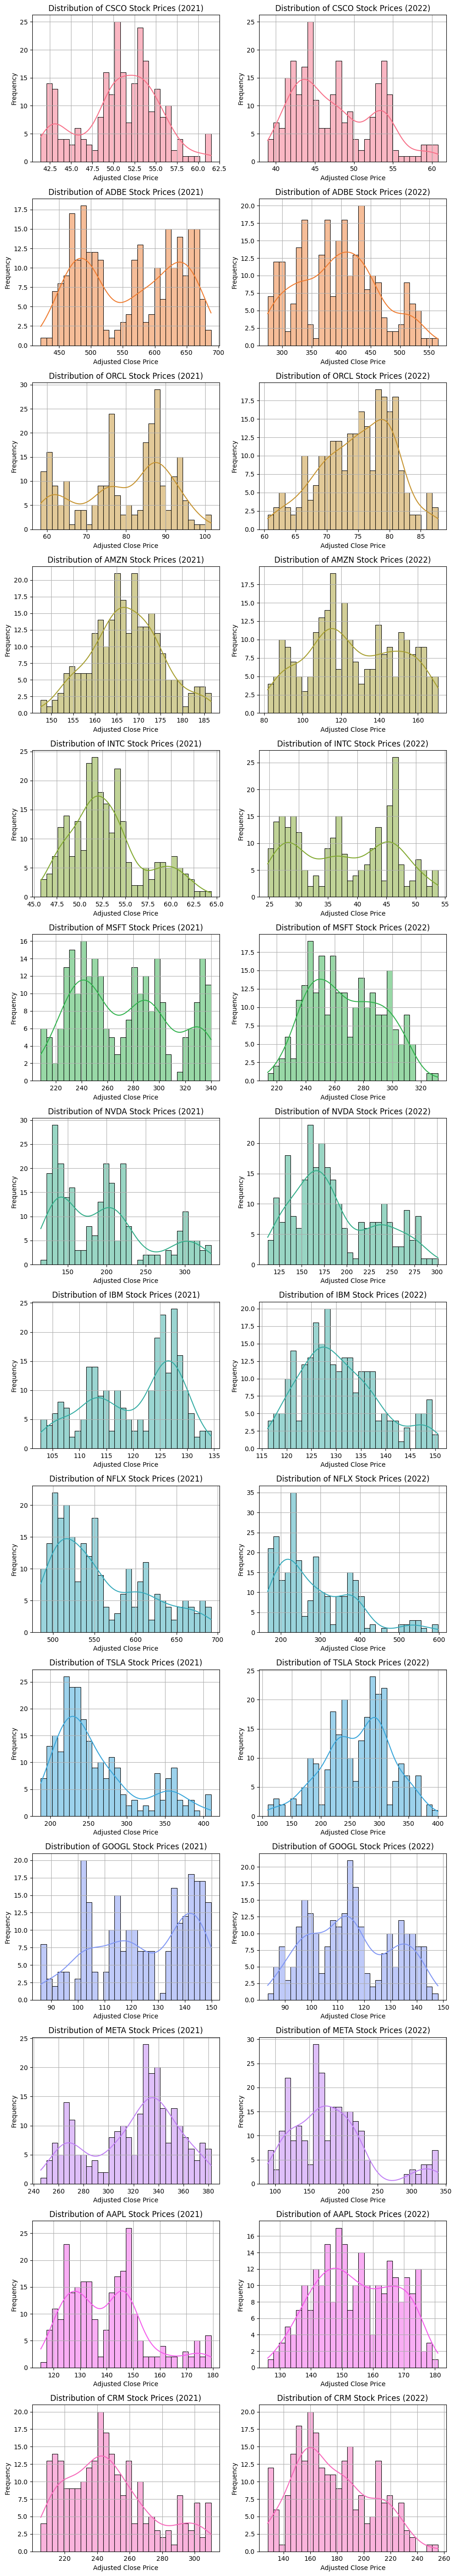

In [11]:
#Distribution of Stock Prices
stock_symbols = df_stocks['stock symbol'].unique()

fig, axes = plt.subplots(nrows=len(stock_symbols), ncols=2, figsize=(10, 4 * len(stock_symbols)))
color_palette = sns.color_palette('husl', n_colors=len(stock_symbols))

for i, stock_symbol in enumerate(stock_symbols):
    # Filter data for before 2022
    df_all_time = df_stocks[(df_stocks['stock symbol'] == stock_symbol) & (df_stocks['Date'].dt.year == 2021)]
    
    # Filter data for 2022
    df_2022 = df_stocks[(df_stocks['stock symbol'] == stock_symbol) & (df_stocks['Date'].dt.year == 2022)]
    
    # Plot for all time
    sns.histplot(data=df_all_time, x='Adj Close', kde=True, bins=30, element='bars', common_norm=False, ax=axes[i, 0], color=color_palette[i])
    axes[i, 0].set_title(f'Distribution of {stock_symbol} Stock Prices (2021)')
    axes[i, 0].set_xlabel('Adjusted Close Price')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(True)
    
    # Plot for 2022
    sns.histplot(data=df_2022, x='Adj Close', kde=True, bins=30, element='bars', common_norm=False, ax=axes[i, 1], color=color_palette[i])
    axes[i, 1].set_title(f'Distribution of {stock_symbol} Stock Prices (2022)')
    axes[i, 1].set_xlabel('Adjusted Close Price')
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].grid(True)
    
plt.tight_layout()